# NYCDSA Machine Learning Project - House Prices

#### Teammates: Vivian Chen, Theodore Choi

For this project, the primary task is to employ machine learning techniques to accurately make predictions given a dataset. The framework will be through the lens of the House Prices: Advanced Regression Techniques from Kaggle. While the primary goal of Kaggle competitions is generally focused on predictive accuracy, it expected to lead the audience through descriptive insights as well. For the purposes of the project, aim is to not only create a model that predicts well, but also to describe data insights drawn from exploration.

## EDA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn

from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
train_raw = pd.read_csv('../data/train.csv')
print(train_raw.shape)
train_raw.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [24]:
train_raw.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [25]:
train_raw.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Investigate Missingness

In [26]:
# Observe missingness
missingRows = train_raw[train_raw.isnull().any(axis=1)].index
missingCols = train_raw.columns[train_raw.isnull().any()]

print('The columns with missingness are: %s' % (list(missingCols)))
print('Number of rows with missingness are: %s (%s %%)' % (len(missingRows), len(missingRows)/train_raw.shape[0]*100))

The columns with missingness are: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Number of rows with missingness are: 1460 (100.0 %)


In [27]:
# How many missing values per col?
import plotly.graph_objects as go

missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = train_raw[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/train_raw.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

ColumnName  MissingValues  PercMissing
16        PoolQC           1453        99.52
18   MiscFeature           1406        96.30
1          Alley           1369        93.77
17         Fence           1179        80.75
10   FireplaceQu            690        47.26
0    LotFrontage            259        17.74
11    GarageType             81         5.55
12   GarageYrBlt             81         5.55
13  GarageFinish             81         5.55
14    GarageQual             81         5.55
15    GarageCond             81         5.55
6   BsmtExposure             38         2.60
8   BsmtFinType2             38         2.60
7   BsmtFinType1             37         2.53
5       BsmtCond             37         2.53
4       BsmtQual             37         2.53
3     MasVnrArea              8         0.55
2     MasVnrType              8         0.55
9     Electrical              1         0.07

Alley: NA = No alley access<br/>
Pool<br/>
Bsmt<br/>
Misc<br/>
Fireplace<br/>
Garage<br/>
Mas<br/>
Electrical<br/>
Fence<br/>
MasVnrArea, MasVnrType, GarageYrBlt, and Electrical are the columns with true missing value (1 missing)

### Impute the missing value

**GarageYrBlt** - 81 missing values

In [28]:
train_raw.groupby(['GarageYrBlt']).SalePrice.agg(['mean','std','count']).reset_index()

GarageYrBlt           mean            std  count
0        1900.0  133900.000000            NaN      1
1        1906.0  135000.000000            NaN      1
2        1908.0  240000.000000            NaN      1
3        1910.0  125000.000000   16643.316977      3
4        1914.0  150943.500000   17050.465815      2
5        1915.0  131200.000000   33658.282784      2
6        1916.0  126800.000000   18102.486017      5
7        1918.0  237000.000000    2828.427125      2
8        1920.0  109992.857143   56658.782526     14
9        1921.0  135800.000000   40757.453306      3
10       1922.0  134800.000000   43875.676633      5
11       1923.0  171166.666667   49538.705406      3
12       1924.0  116166.666667    9464.847243      3
13       1925.0  145890.000000   36669.445349     10
14       1926.0  136416.666667   51585.285370      6
15       1927.0  115000.000000            NaN      1
16       1928.0  129875.000000   44110.420160      4
17       1929.0  148500.000000   40305.086528      2
18       1930.0  131925.500000   45424.498761      8
19       1931.0  153475.000000   54103.935470      4
20       1932.0  221333.333333  103635.579476      3
21       1933.0  137500.000000            NaN      1
22       1934.0  249550.000000  154927.095758      2
23       1935.0  142250.000000   63704.395453      4
24       1936.0  142900.000000   60361.825685      5
25       1937.0  121750.000000    3181.980515      2
26       1938.0   89850.000000   30650.734086      3
27       1939.0  163366.666667   63071.863775      9
28       1940.0  141778.571429   46157.609233     14
29       1941.0  128450.000000   59882.964560     10
30       1942.0  162000.000000   21920.310217      2
31       1945.0  131875.000000   85401.380746      4
32       1946.0  120500.000000   25617.832331      4
33       1947.0  126750.000000   11667.261890      2
34       1948.0  136200.000000   33657.540017     11
35       1949.0  124987.500000   24499.879737      8
36       1950.0  139866.833333   45638.203136     24
37       1951.0  140133.333333   25099.057087      6
38       1952.0  101331.000000   39267.043217      3
39       1953.0  145241.666667   43197.021327     12
40       1954.0  139694.736842   43764.273528     19
41       1955.0  142328.846154   31749.717594     13
42       1956.0  125384.375000   33960.426571     16
43       1957.0  142422.500000   39221.565211     20
44       1958.0  137129.095238   45237.077019     21
45       1959.0  163358.823529   59229.511846     17
46       1960.0  159097.368421   36999.956733     19
47       1961.0  140296.153846   38968.034237     13
48       1962.0  139671.428571   22680.214789     21
49       1963.0  139115.625000   17993.422120     16
50       1964.0  154782.444444   25919.477451     18
51       1965.0  150413.476190   66123.019243     21
52       1966.0  155193.809524   41677.006308     21
53       1967.0  133393.333333   29951.972667     15
54       1968.0  162117.846154   41401.853183     26
55       1969.0  161277.266667   31174.637733     15
56       1970.0  147800.000000   51377.191335     20
57       1971.0  147600.000000   56745.073208     13
58       1972.0  155978.571429   61616.661440     14
59       1973.0  138950.000000   46058.937995     14
60       1974.0  156258.333333   47187.218640     18
61       1975.0  177213.777778   44233.403763      9
62       1976.0  160901.896552   41121.979881     29
63       1977.0  162908.571429   39973.135254     35
64       1978.0  160547.368421   33761.637803     19
65       1979.0  146048.133333   42485.744320     15
66       1980.0  141376.666667   34194.500741     15
67       1981.0  188090.000000   87293.520824     10
68       1982.0  188225.000000  128637.096127      4
69       1983.0  182571.428571   74572.709805      7
70       1984.0  165625.000000   33948.227389      8
71       1985.0  160200.000000   52066.303883     10
72       1986.0  167166.666667   34556.716665      6
73       1987.0  162045.454545   60250.848353     11
74       1988.0  196892.85714

<AxesSubplot:xlabel='GarageYrBlt', ylabel='mean'>

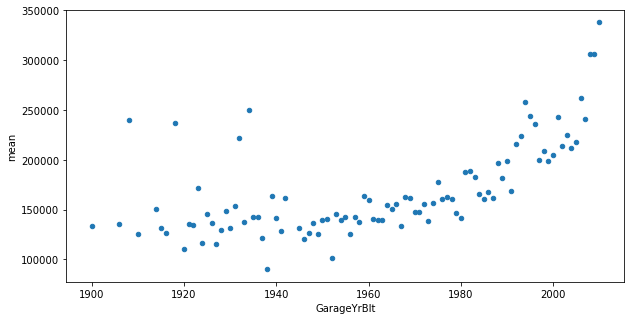

In [29]:
train_raw.groupby(['GarageYrBlt']).SalePrice.agg(['mean','std','count']).reset_index().plot(x='GarageYrBlt',y='mean',kind='scatter')

In [33]:
# Older garages are less expensive. 
# Missing values for the garage year built is associated with no garage, so its missing values will be 
# imputed using the oldest value minus 10 years.
train_raw.GarageYrBlt[train_raw.GarageYrBlt.isnull()] = train_raw.GarageYrBlt.min() - 10

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
train_raw.GarageYrBlt[train_raw.GarageYrBlt.isnull()] # Check that there's no more missing values in GarageYrBlt

Series([], Name: GarageYrBlt, dtype: float64)

**MasVnrArea, MasVnrType** - 8 missing values

<AxesSubplot:xlabel='MasVnrArea', ylabel='mean'>

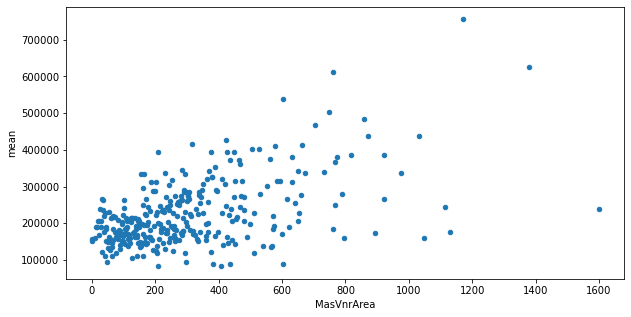

In [37]:
train_raw.groupby(['MasVnrArea']).SalePrice.agg(['mean','std','count']).reset_index().plot(x='MasVnrArea',y='mean',kind='scatter')

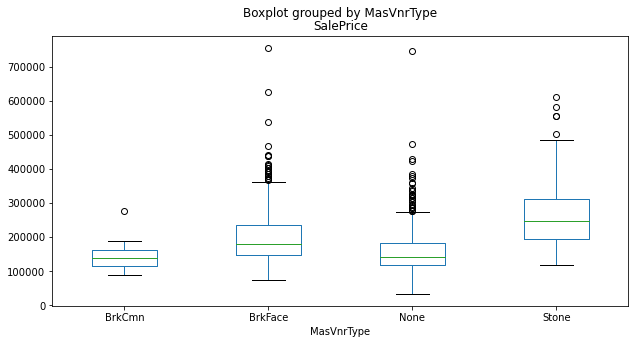

In [43]:
bp = train_raw.boxplot(column = ['SalePrice'], by = 'MasVnrType',grid=False)
plt.plot(train_raw.MasVnrType[train_raw.MasVnrType.isnull()],train_raw.SalePrice[train_raw.MasVnrType.isnull()],'r.')

In [48]:
train_raw.SalePrice[train_raw.MasVnrType.isnull()]

234     216500
529     200624
650     205950
936     184900
973     182000
977     199900
1243    465000
1278    237000
Name: SalePrice, dtype: int64

In [49]:
# Will use kNN imputation along with the Electrial cat variable below.

In [50]:
train_raw[train_raw.Electrical.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

Since there's only one missing values, it's very unlikely that imputation will impact the model fit. Hence, the imputation will be done by taking the mode from the houses with the same price. ==> Changing to kNN imputation later.

In [51]:
#idx_missing = train_raw[train_raw.Electrical.isnull()].index
#imp_saleprice = list(train_raw.SalePrice[train_raw.Electrical.isnull()])

#imps_electrical = train_raw.Electrical[train_raw.SalePrice == imp_saleprice[0]]
#imps_electrical.mode()

In [52]:
#idx_missing
#train_raw.Electrical[idx_missing] = list(imps_electrical.mode())[0]

In [53]:
#train_raw.Electrical[idx_missing]

### Change NA values to NotAvail instead of null values

In [55]:
missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = train_raw[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/train_raw.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

ColumnName  MissingValues  PercMissing
16        PoolQC           1453        99.52
18   MiscFeature           1406        96.30
1          Alley           1369        93.77
17         Fence           1179        80.75
10   FireplaceQu            690        47.26
0    LotFrontage            259        17.74
11    GarageType             81         5.55
13  GarageFinish             81         5.55
14    GarageQual             81         5.55
15    GarageCond             81         5.55
6   BsmtExposure             38         2.60
8   BsmtFinType2             38         2.60
7   BsmtFinType1             37         2.53
5       BsmtCond             37         2.53
4       BsmtQual             37         2.53
3     MasVnrArea              8         0.55
2     MasVnrType              8         0.55
9     Electrical              1         0.07
12   GarageYrBlt              0         0.00

In [56]:
for idx, col in enumerate(list(missingCols)):
    train_raw[col][train_raw[col].isnull()] = 'NotAvail'

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Go Back to MasVnrArea, MasVnrType, and Electrical**

In [62]:
train_raw.MasVnrArea[train_raw.MasVnrArea == 'NotAvail'] = np.nan
train_raw.MasVnrType[train_raw.MasVnrType == 'NotAvail'] = np.nan
train_raw.Electrical[train_raw.Electrical == 'NotAvail'] = np.nan

missingNs = [0] * len(list(missingCols))
for idx, col in enumerate(list(missingCols)):
    missingNs[idx] = train_raw[col].isnull().sum()

data_missing = pd.DataFrame(list(missingCols))
data_missing.columns = ['ColumnName']
data_missing['MissingValues'] = missingNs
data_missing['PercMissing'] = np.round(np.array(missingNs)/train_raw.shape[0]*100,2)
data_missing.sort_values(['PercMissing'],ascending=False)

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ColumnName  MissingValues  PercMissing
2     MasVnrType              8         0.55
3     MasVnrArea              8         0.55
9     Electrical              1         0.07
11    GarageType              0         0.00
17         Fence              0         0.00
16        PoolQC              0         0.00
15    GarageCond              0         0.00
14    GarageQual              0         0.00
13  GarageFinish              0         0.00
12   GarageYrBlt              0         0.00
0    LotFrontage              0         0.00
10   FireplaceQu              0         0.00
1          Alley              0         0.00
8   BsmtFinType2              0         0.00
7   BsmtFinType1              0         0.00
6   BsmtExposure              0         0.00
5       BsmtCond              0         0.00
4       BsmtQual              0         0.00
18   MiscFeature              0         0.00

In [64]:
# kNN imputation
imputer = KNNImputer()
X_raw = train_raw.iloc[:,0:80]
imputer.fit(X_raw)
Xtrans = imputer.transform(X_raw)
Xtrans.head()

ValueError: could not convert string to float: 'RL'

In [13]:
missingRows1 = train_raw[train_raw.isnull().any(axis=1)].index
missingCols1 = train_raw.columns[train_raw.isnull().any()]

print('The columns with missingness are: %s' % (list(missingCols1)))
print('Number of rows with missingness are: %s (%s %%)' % (len(missingRows1), len(missingRows1)/train_raw.shape[0]*100))

The columns with missingness are: []
Number of rows with missingness are: 0 (0.0 %)


In [14]:
%store train_raw

Stored 'train_raw' (DataFrame)


### Preprocess test dataset as well

In [71]:
test_raw = pd.read_csv('../data/test.csv')
test_raw.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [137]:
train_raw.columns.isin(test_raw.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [129]:
# Observe missingness
missingRows2 = test_raw[test_raw.isnull().any(axis=1)].index
missingCols2 = test_raw.columns[test_raw.isnull().any()]

print('The columns with missingness are: %s' % (list(missingCols2)))
print('Number of rows with missingness are: %s (%s %%)' % (len(missingRows2), len(missingRows2)/test_raw.shape[0]*100))

The columns with missingness are: ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Number of rows with missingness are: 1459 (100.0 %)


In [130]:
missingNs2 = [0] * len(list(missingCols2))
for idx, col in enumerate(list(missingCols2)):
    missingNs2[idx] = test_raw[col].isnull().sum()

data_missing2 = pd.DataFrame(list(missingCols2))
data_missing2.columns = ['ColumnName']
data_missing2['MissingValues'] = missingNs2
data_missing2['PercMissing'] = np.round(np.array(missingNs2)/test_raw.shape[0]*100,2)
data_missing2.sort_values(['PercMissing'],ascending=False)

ColumnName  MissingValues  PercMissing
29        PoolQC           1456        99.79
31   MiscFeature           1408        96.50
2          Alley           1352        92.67
30         Fence           1169        80.12
21   FireplaceQu            730        50.03
1    LotFrontage            227        15.56
28    GarageCond             78         5.35
23   GarageYrBlt             78         5.35
27    GarageQual             78         5.35
24  GarageFinish             78         5.35
22    GarageType             76         5.21
9       BsmtCond             45         3.08
10  BsmtExposure             44         3.02
8       BsmtQual             44         3.02
11  BsmtFinType1             42         2.88
13  BsmtFinType2             42         2.88
6     MasVnrType             16         1.10
7     MasVnrArea             15         1.03
0       MSZoning              4         0.27
17  BsmtFullBath              2         0.14
18  BsmtHalfBath              2         0.14
20    Functional              2         0.14
3      Utilities              2         0.14
25    GarageCars              1         0.07
26    GarageArea              1         0.07
16   TotalBsmtSF              1         0.07
19   KitchenQual              1         0.07
15     BsmtUnfSF              1         0.07
14    BsmtFinSF2              1         0.07
12    BsmtFinSF1              1         0.07
5    Exterior2nd              1         0.07
4    Exterior1st              1         0.07
32      SaleType              1         0.07

Columns with real missing values are: MSZoning (4), Functional (2), Utilities (2), GarageCars (1), GarageArea (1), TotalBsmtSF (1), KitchenQual (1), BsmtUnfSF (1), BsmtFinSF1 (1), BsmtFinSF2 (1), Exterior1st (1), Exterior2nd (1), Saletype (1)

In [134]:
# Display rows with missing values identified above
test_missing_sub = data_missing2[data_missing2.MissingValues < 4].sort_values(['PercMissing'],ascending=False)
test_missing_sub

ColumnName  MissingValues  PercMissing
3      Utilities              2         0.14
17  BsmtFullBath              2         0.14
18  BsmtHalfBath              2         0.14
20    Functional              2         0.14
4    Exterior1st              1         0.07
5    Exterior2nd              1         0.07
12    BsmtFinSF1              1         0.07
14    BsmtFinSF2              1         0.07
15     BsmtUnfSF              1         0.07
16   TotalBsmtSF              1         0.07
19   KitchenQual              1         0.07
25    GarageCars              1         0.07
26    GarageArea              1         0.07
32      SaleType              1         0.07

In [136]:
df_test_missing = pd.DataFrame()
for idx, col in enumerate(test_missing_sub.ColumnName):
    df_test_missing = df_test_missing.append(test_raw[test_raw[col].isnull()])

df_test_missing = df_test_missing.drop_duplicates()
df_test_missing

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455   1916          30      NaN        109.0    21780   Grvl   NaN      Reg   
485   1946          20       RL          NaN    31220   Pave   NaN      IR1   
660   2121          20       RM         99.0     5940   Pave   NaN      IR1   
728   2189          20       RL        123.0    47007   Pave   NaN      IR1   
756   2217          20      NaN         80.0    14584   Pave   NaN      Reg   
1013  2474          50       RM         60.0    10320   Pave  Grvl      Reg   
691   2152          30       RL         85.0    19550   Pave   NaN      Reg   
95    1556          50       RL         72.0    10632   Pave   NaN      IR1   
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   
1029  2490          20       RL         85.0    13770   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
455          Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
485          Bnk       NaN       FR2       Gtl      Gilbert      Feedr   
660          Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
1013         Lvl    AllPub    Corner       Gtl       IDOTRR     Artery   
691          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
95           Lvl    AllPub    Inside       Gtl      ClearCr       Norm   
1116         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
1029         Lvl    AllPub    Corner       Gtl       Sawyer      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
455        Norm     1Fam     1Story            2            4       1910   
485        Norm     1Fam     1Story            6            2       1952   
660        Norm     1Fam     1Story            4            7       1946   
728        Norm     1Fam     1Story            5            7       1959   
756        Norm     1Fam     1Story            1            5       1952   
1013       Norm     1Fam     1.5Fin            4            1       1910   
691        Norm     1Fam     1Story            5            7       1940   
95         Norm     1Fam     1.5Fin            5            3       1917   
1116       Norm     1Fam     2Story            5            6       1923   
1029       Norm     1Fam     1Story            5            6       1958   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
455           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
485           1952       Hip  CompShg     BrkFace     BrkFace       None   
660           1950     Gable  CompShg     MetalSd      CBlock       None   
728           1996     Gable  CompShg     Plywood     Plywood       None   
756           1952     Gable  CompShg     AsbShng     VinylSd       None   
1013          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
691           2007      Flat  Tar&Grv         NaN         NaN       None   
95            1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1116          1999     Gable  CompShg     Wd Sdng     Plywood       None   
1029          1998     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
455          0.0        Fa        Fa     CBlock      NaN      NaN   
485          0.0        TA        TA     CBlock       TA       TA   
660          0.0        TA        TA      PConc      NaN      NaN   
728          0.0        TA        TA       Slab      NaN      NaN   
756          0.0        Fa        Po       Slab      NaN      NaN   
1013         0.0        Fa        Fa     CBlock       TA       Fa   
691          0.0        TA        TA      PConc       TA       TA   
95           0.0        TA        TA     BrkTil       Gd       Fa   
1116         0.0        TA  

In [ ]:
#for idx, col in enumerate(list(missingCols2)):
#    train_raw[col][train_raw[col].isnull()] = 'NotAvail'

## Investigate the Data Distribution

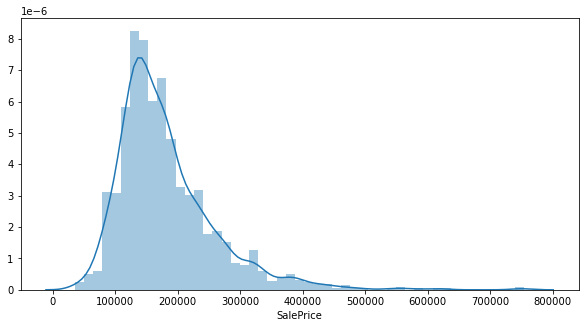

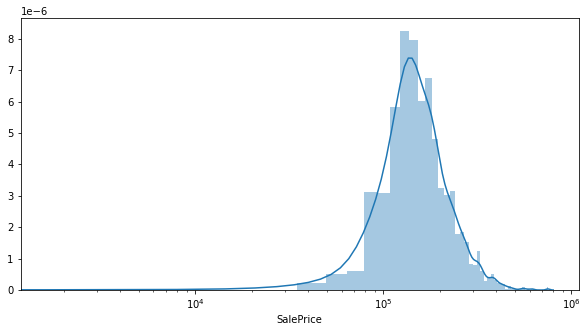

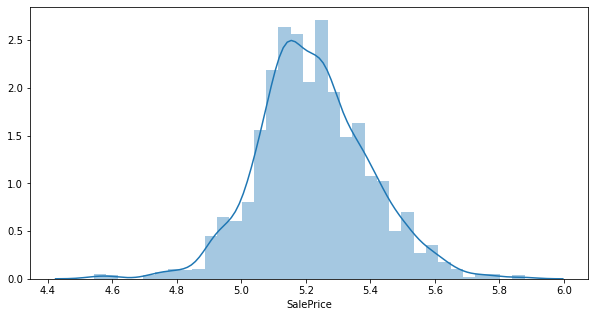

In [65]:
# Distribution of the house prices - Lognormal distribution
sn.distplot(train_raw.SalePrice)
plt.show()

sn.distplot(train_raw.SalePrice)
plt.xscale('log')
plt.show()

sn.distplot(np.log10(train_raw.SalePrice))
plt.show()

In [157]:
# Any outliers?
SalePrice_log10 = pd.DataFrame(np.log10(train_raw.SalePrice))
Outliers_3SD = SalePrice_log10[abs(SalePrice_log10.SalePrice-SalePrice_log10.SalePrice.mean())/SalePrice_log10.SalePrice.std() > 3]
print('Number of outliers: %s' %(Outliers_3SD.shape[0]))
Outliers_3SD

Number of outliers: 12


SalePrice
30     4.602060
440    5.744293
495    4.542825
533    4.594393
691    5.877947
803    5.765619
898    5.786508
916    4.547910
968    4.578639
1046   5.745528
1169   5.795880
1182   5.872156

In [160]:
train_raw.loc[Outliers_3SD.index,:]

Id  MSSubClass MSZoning LotFrontage  LotArea Street     Alley  \
30      31          70  C (all)          50     8500   Pave      Pave   
440    441          20       RL         105    15431   Pave  NotAvail   
495    496          30  C (all)          60     7879   Pave  NotAvail   
533    534          20       RL          50     5000   Pave  NotAvail   
691    692          60       RL         104    21535   Pave  NotAvail   
803    804          60       RL         107    13891   Pave  NotAvail   
898    899          20       RL         100    12919   Pave  NotAvail   
916    917          20  C (all)          50     9000   Pave  NotAvail   
968    969          50       RM          50     5925   Pave  NotAvail   
1046  1047          60       RL          85    16056   Pave  NotAvail   
1169  1170          60       RL         118    35760   Pave  NotAvail   
1182  1183          60       RL         160    15623   Pave  NotAvail   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
30        Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
440       Reg         Lvl    AllPub    Inside       Gtl      NridgHt   
495       Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
533       Reg         Low    AllPub    Inside       Mod      BrkSide   
691       IR1         Lvl    AllPub    Corner       Gtl      NoRidge   
803       Reg         Lvl    AllPub    Inside       Gtl      NridgHt   
898       IR1         Lvl    AllPub    Inside       Gtl      NridgHt   
916       Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
968       Reg         Lvl    AllPub    Inside       Gtl      OldTown   
1046      IR1         Lvl    AllPub    Inside       Gtl      StoneBr   
1169      IR1         Lvl    AllPub   CulDSac       Gtl      NoRidge   
1182      IR1         Lvl    AllPub    Corner       Gtl      NoRidge   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
30        Feedr       Norm     1Fam     2Story            4            4   
440        Norm       Norm     1Fam     1Story           10            5   
495        Norm       Norm     1Fam     1Story            4            5   
533        Norm       Norm     1Fam     1Story            1            3   
691        Norm       Norm     1Fam     2Story           10            6   
803        Norm       Norm     1Fam     2Story            9            5   
898        Norm       Norm     1Fam     1Story            9            5   
916        Norm       Norm     1Fam     1Story            2            3   
968        Norm       Norm     1Fam     1.5Fin            3            6   
1046       Norm       Norm     1Fam     2Story            9            5   
1169       Norm       Norm     1Fam     2Story           10            5   
1182       Norm       Norm     1Fam     2Story           10            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
30         1920          1950   Gambrel  CompShg     BrkFace     BrkFace   
440        2008          2008       Hip  CompShg     VinylSd     VinylSd   
495        1920          1950     Gable  CompShg     Wd Sdng     Wd Sdng   
533        1946          1950     Gable  CompShg     VinylSd     VinylSd   
691        1994          1995     Gable  WdShngl     HdBoard     HdBoard   
803        2008          2009       Hip  CompShg     VinylSd     VinylSd   
898        2009          2010       Hip  CompShg     VinylSd     VinylSd   
916        1949          1950     Gable  CompShg     AsbShng     AsbShng   
968        1910          1950     Gable  CompShg     VinylSd     VinylSd   
1046       2005          2006       Hip  CompShg     CemntBd     CmentBd   
1169       1995          1996       Hip  CompShg     HdBoard     HdBoard   
1182       1996          1996       Hip  CompShg     Wd Sdng     ImStucc   

     MasVnrType MasVnrArea ExterQual ExterCond Foundation  BsmtQual  BsmtCond  \
30         None          0        TA        Fa     BrkTil     

In [164]:
# Normality test
k2, p = stats.normaltest(SalePrice_log10)
print(k2)
print(p)

[25.50700983]
[2.89216582e-06]


In [166]:
print(SalePrice_log10.skew())
print(SalePrice_log10.kurtosis())
print(SalePrice_log10.skew()**2 + SalePrice_log10.kurtosis()**2)

SalePrice    0.121335
dtype: float64
SalePrice    0.809532
dtype: float64
SalePrice    0.670064
dtype: float64


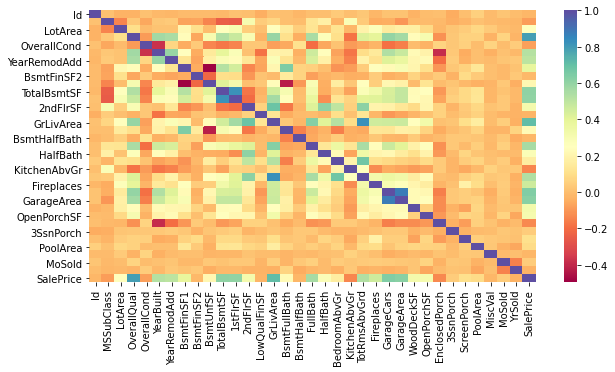

In [181]:
# Observe Crosscorrelations
corrMatrix = train_raw.corr()
sn.heatmap(corrMatrix, annot=False, cmap="Spectral")
plt.show()

In [171]:
corrMatrix.sort_values('SalePrice',ascending=False).SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [188]:
corrMatrix = train_raw.iloc[:,0:80].corr()
corrMatrix_abs = pd.DataFrame(corrMatrix.abs().unstack().sort_values(kind="quicksort",ascending=False))
corrMatrix_abs.columns = ['rho']
corrMatrix_abs = corrMatrix_abs[corrMatrix_abs.rho < 1]
print(corrMatrix_abs[corrMatrix_abs.rho >= 0.5].iloc[::2].shape[0])
corrMatrix_abs[corrMatrix_abs.rho >= 0.5].iloc[::2]

23


rho
GarageArea   GarageCars    0.882475
TotRmsAbvGrd GrLivArea     0.825489
1stFlrSF     TotalBsmtSF   0.819530
GrLivArea    2ndFlrSF      0.687501
TotRmsAbvGrd BedroomAbvGr  0.676620
BsmtFinSF1   BsmtFullBath  0.649212
GrLivArea    FullBath      0.630012
2ndFlrSF     TotRmsAbvGrd  0.616423
HalfBath     2ndFlrSF      0.609707
GarageCars   OverallQual   0.600671
GrLivArea    OverallQual   0.593007
YearBuilt    YearRemodAdd  0.592855
OverallQual  YearBuilt     0.572323
1stFlrSF     GrLivArea     0.566024
GarageArea   OverallQual   0.562022
FullBath     TotRmsAbvGrd  0.554784
OverallQual  YearRemodAdd  0.550684
FullBath     OverallQual   0.550600
YearBuilt    GarageCars    0.537850
TotalBsmtSF  OverallQual   0.537808
BsmtFinSF1   TotalBsmtSF   0.522396
BedroomAbvGr GrLivArea     0.521270
2ndFlrSF     BedroomAbvGr  0.502901

In [ ]:
xmodel=xgb.XGBRegressor(nthread= -1,gpu_id=-1)
# set the parameter grid
grid_para = {'min_child_weight': [1,2], # default = 1
             'gamma': [0, 0.025, 0.055, 0.075], # default = 0
             'reg_alpha': [0], # default = 0
             "learning_rate": [0.05, 0.078, 0.1], #  default=0.3
             'subsample': [0.2,0.3,0.4], # default =1
             'colsample_bytree': [0.4, 0.5, 0.6], # default =1
             'max_depth': [2,3,4], # default =6
             "n_estimators": [100,125,137,150],
             'random_state' :[1]
}
# run the XGB regressor through the grid search
grid_search_xmodel = ms.GridSearchCV(xmodel, grid_para, scoring='neg_root_mean_squared_error', cv=5, n_jobs= -1, verbose=4)
grid_search_xmodel.fit(Xu_train, yu_train)